<a href="https://colab.research.google.com/github/tamayodb/CCMACLRL_PROJECT_COM222/blob/main/Crop_Yield_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Decision Tree Regression Approach for Forecasting Rice and Corn Crop Yields in Nueva Ecija, Philippines


Crop yield prediction is a crucial task in agriculture as it aids in food security, resource allocation, and strategic planning. In this project, we approach crop yield prediction as a regression problem, using weather and other environmental data to predict the production output.

The crops included in the dataset are:


*   Palay (Rice)
*   Corn



Machine Learning methods are applied to predict crop yield using publicly available data from:



*   Philippine Statistics Authority (PSA)

Source:

[Environmental Data](https://psa.gov.ph/content/annual-average-maximum-temperature-reached-313-degrees-celsius-2023)

[Palay and Corn: Volume of Production](https://openstat.psa.gov.ph/PXWeb/pxweb/en/DB/DB__2E__CS/0012E4EVCP0.px/?rxid=bdf9d8da-96f1-4100-ae09-18cb3eaeb313)


**Dataset Description for Crop Yield Prediction**

This dataset contains information on crop production along with relevant environmental and temporal factors. It includes the following variables:



*   **crop_type**:  indicates the type of crop, with "0" representing palay and "1" representing corn
*   **year**: records the calendar year of data collection
*   **quarter**: identifies the part of the year (1–4)
*   **production**: the target variable, measuring the quantity of crop produced in units (tons)
*   **rainfall**: the total rainfall during the growing period (in millimeters)
*   **max_temp and min_temp**: the maximum and minimum temperatures (in degrees Celsius)
*   **mean_temp**: the average temperature for the period
*   **relative_humidity**: the average humidity during the growing season, expressed as a percentage







### Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
!pip install anvil-uplink

  Using cached argparse-1.4.0-py2.py3-none-any.whl.metadata (2.8 kB)
Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [ ]:
import anvil.server

anvil.server.connect("server_HBXWHZEFIBYOSTL5MS3BWWBA-SOEZWSLUWXXWO6N7")

## I. Data Pre-processing

In [ ]:
# Load Data
dataframe = pd.read_csv('yield.csv')

In [ ]:
# Display the shape of the data
print("Data Shape:", dataframe.shape)

# Display the first five rows
dataframe.head()

Data Shape: (80, 9)


,crop_type,year,quarter,production,rainfall,max_temp,min_temp,mean_temp,relative_humidity
0,0,2014,1,148355.0,2.4,31.8,21.7,26.8,79
1,0,2014,2,804937.0,84.8,35.9,25.3,30.6,81
2,0,2014,3,77058.0,264.8,32.0,24.6,28.4,91
3,0,2014,4,900646.0,89.7,32.7,23.5,28.1,76
4,0,2015,1,154393.0,6.7,29.9,21.9,25.9,70


In [ ]:
# Statistical summary
dataframe.describe()

,crop_type,year,quarter,production,rainfall,max_temp,min_temp,mean_temp,relative_humidity
count,80.000000,80.000000,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000,80.000000
mean,0.500000,2018.500000,2.500000,234835.623125,154.66250,32.932500,23.662500,28.375000,78.250000
std,0.503155,2.890403,1.125088,312098.635057,132.02408,1.482623,1.025421,1.288852,5.840713
min,0.000000,2014.000000,1.000000,381.000000,2.40000,29.900000,21.300000,25.900000,66.000000
25%,0.000000,2016.000000,1.750000,10827.750000,36.47500,32.000000,22.800000,27.675000,74.000000
50%,0.500000,2018.500000,2.500000,33998.250000,126.75000,32.500000,23.900000,28.100000,77.500000
75%,1.000000,2021.000000,3.250000,402561.067500,249.20000,34.150000,24.425000,29.525000,82.000000
max,1.000000,2023.000000,4.000000,900646.000000,488.00000,35.900000,25.300000,31.900000,91.000000


In [ ]:
# Check for missing values
dataframe.isnull().sum()

,0
crop_type,0
year,0
quarter,0
production,0
rainfall,0
max_temp,0
min_temp,0
mean_temp,0
relative_humidity,0


Encoding the Crop Type

> Since crop_type is already encoded as 0 for Palay and 1 for Corn, no additional encoding is needed for this variable.





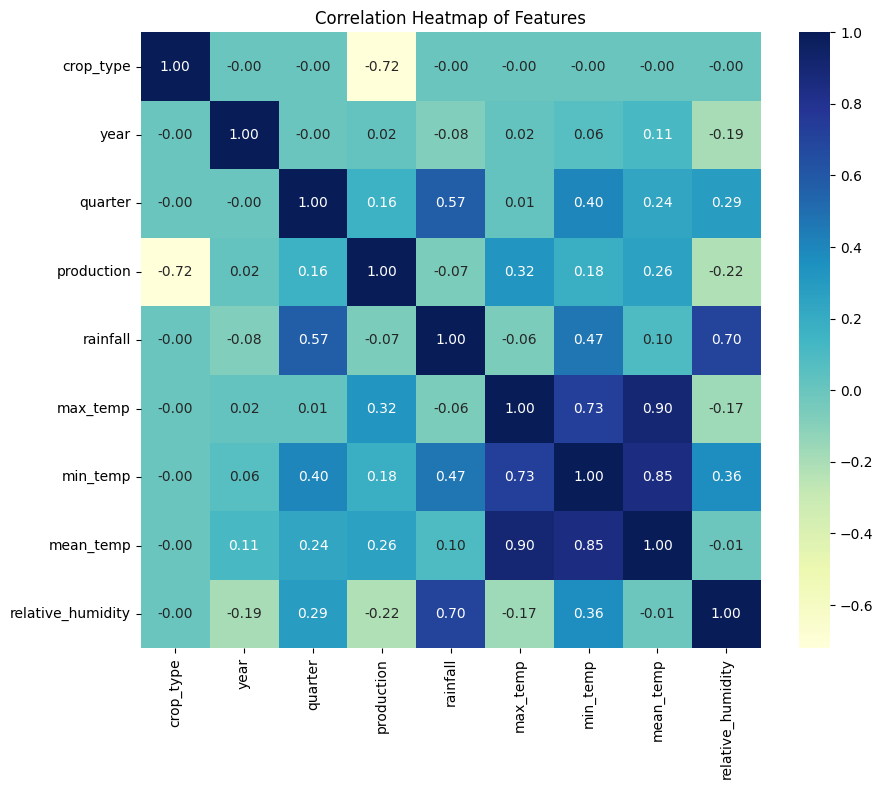

In [ ]:
# Calculate the correlation matrix
correlation_matrix = dataframe.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("Correlation Heatmap of Features")
plt.show()


In [ ]:
# Calculate the correlation matrix
correlation = dataframe.corr()
correlation

,crop_type,year,quarter,production,rainfall,max_temp,min_temp,mean_temp,relative_humidity
crop_type,1.000000e+00,-5.768574e-14,-4.567863e-16,-0.720660,-3.791111e-17,-1.286683e-15,-2.613513e-15,-2.167099e-16,-4.055195e-16
year,-5.768574e-14,1.000000e+00,-6.019037e-15,0.016898,-7.796230e-02,1.506447e-02,6.107289e-02,1.141697e-01,-1.919502e-01
quarter,-4.567863e-16,-6.019037e-15,1.000000e+00,0.162187,5.651769e-01,1.441814e-02,3.960880e-01,2.356933e-01,2.927954e-01
production,-7.206603e-01,1.689839e-02,1.621868e-01,1.000000,-6.529777e-02,3.214830e-01,1.849430e-01,2.640038e-01,-2.200773e-01
rainfall,-3.791111e-17,-7.796230e-02,5.651769e-01,-0.065298,1.000000e+00,-6.306563e-02,4.744806e-01,9.857803e-02,7.028186e-01
max_temp,-1.286683e-15,1.506447e-02,1.441814e-02,0.321483,-6.306563e-02,1.000000e+00,7.291766e-01,8.994789e-01,-1.672985e-01
min_temp,-2.613513e-15,6.107289e-02,3.960880e-01,0.184943,4.744806e-01,7.291766e-01,1.000000e+00,8.492197e-01,3.629960e-01
mean_temp,-2.167099e-16,1.141697e-01,2.356933e-01,0.264004,9.857803e-02,8.994789e-01,8.492197e-01,1.000000e+00,-1.328407e-02
relative_humidity,-4.055195e-16,-1.919502e-01,2.927954e-01,-0.220077,7.028186e-01,-1.672985e-01,3.629960e-01,-1.328407e-02,1.000000e+00


Visualizing the Data

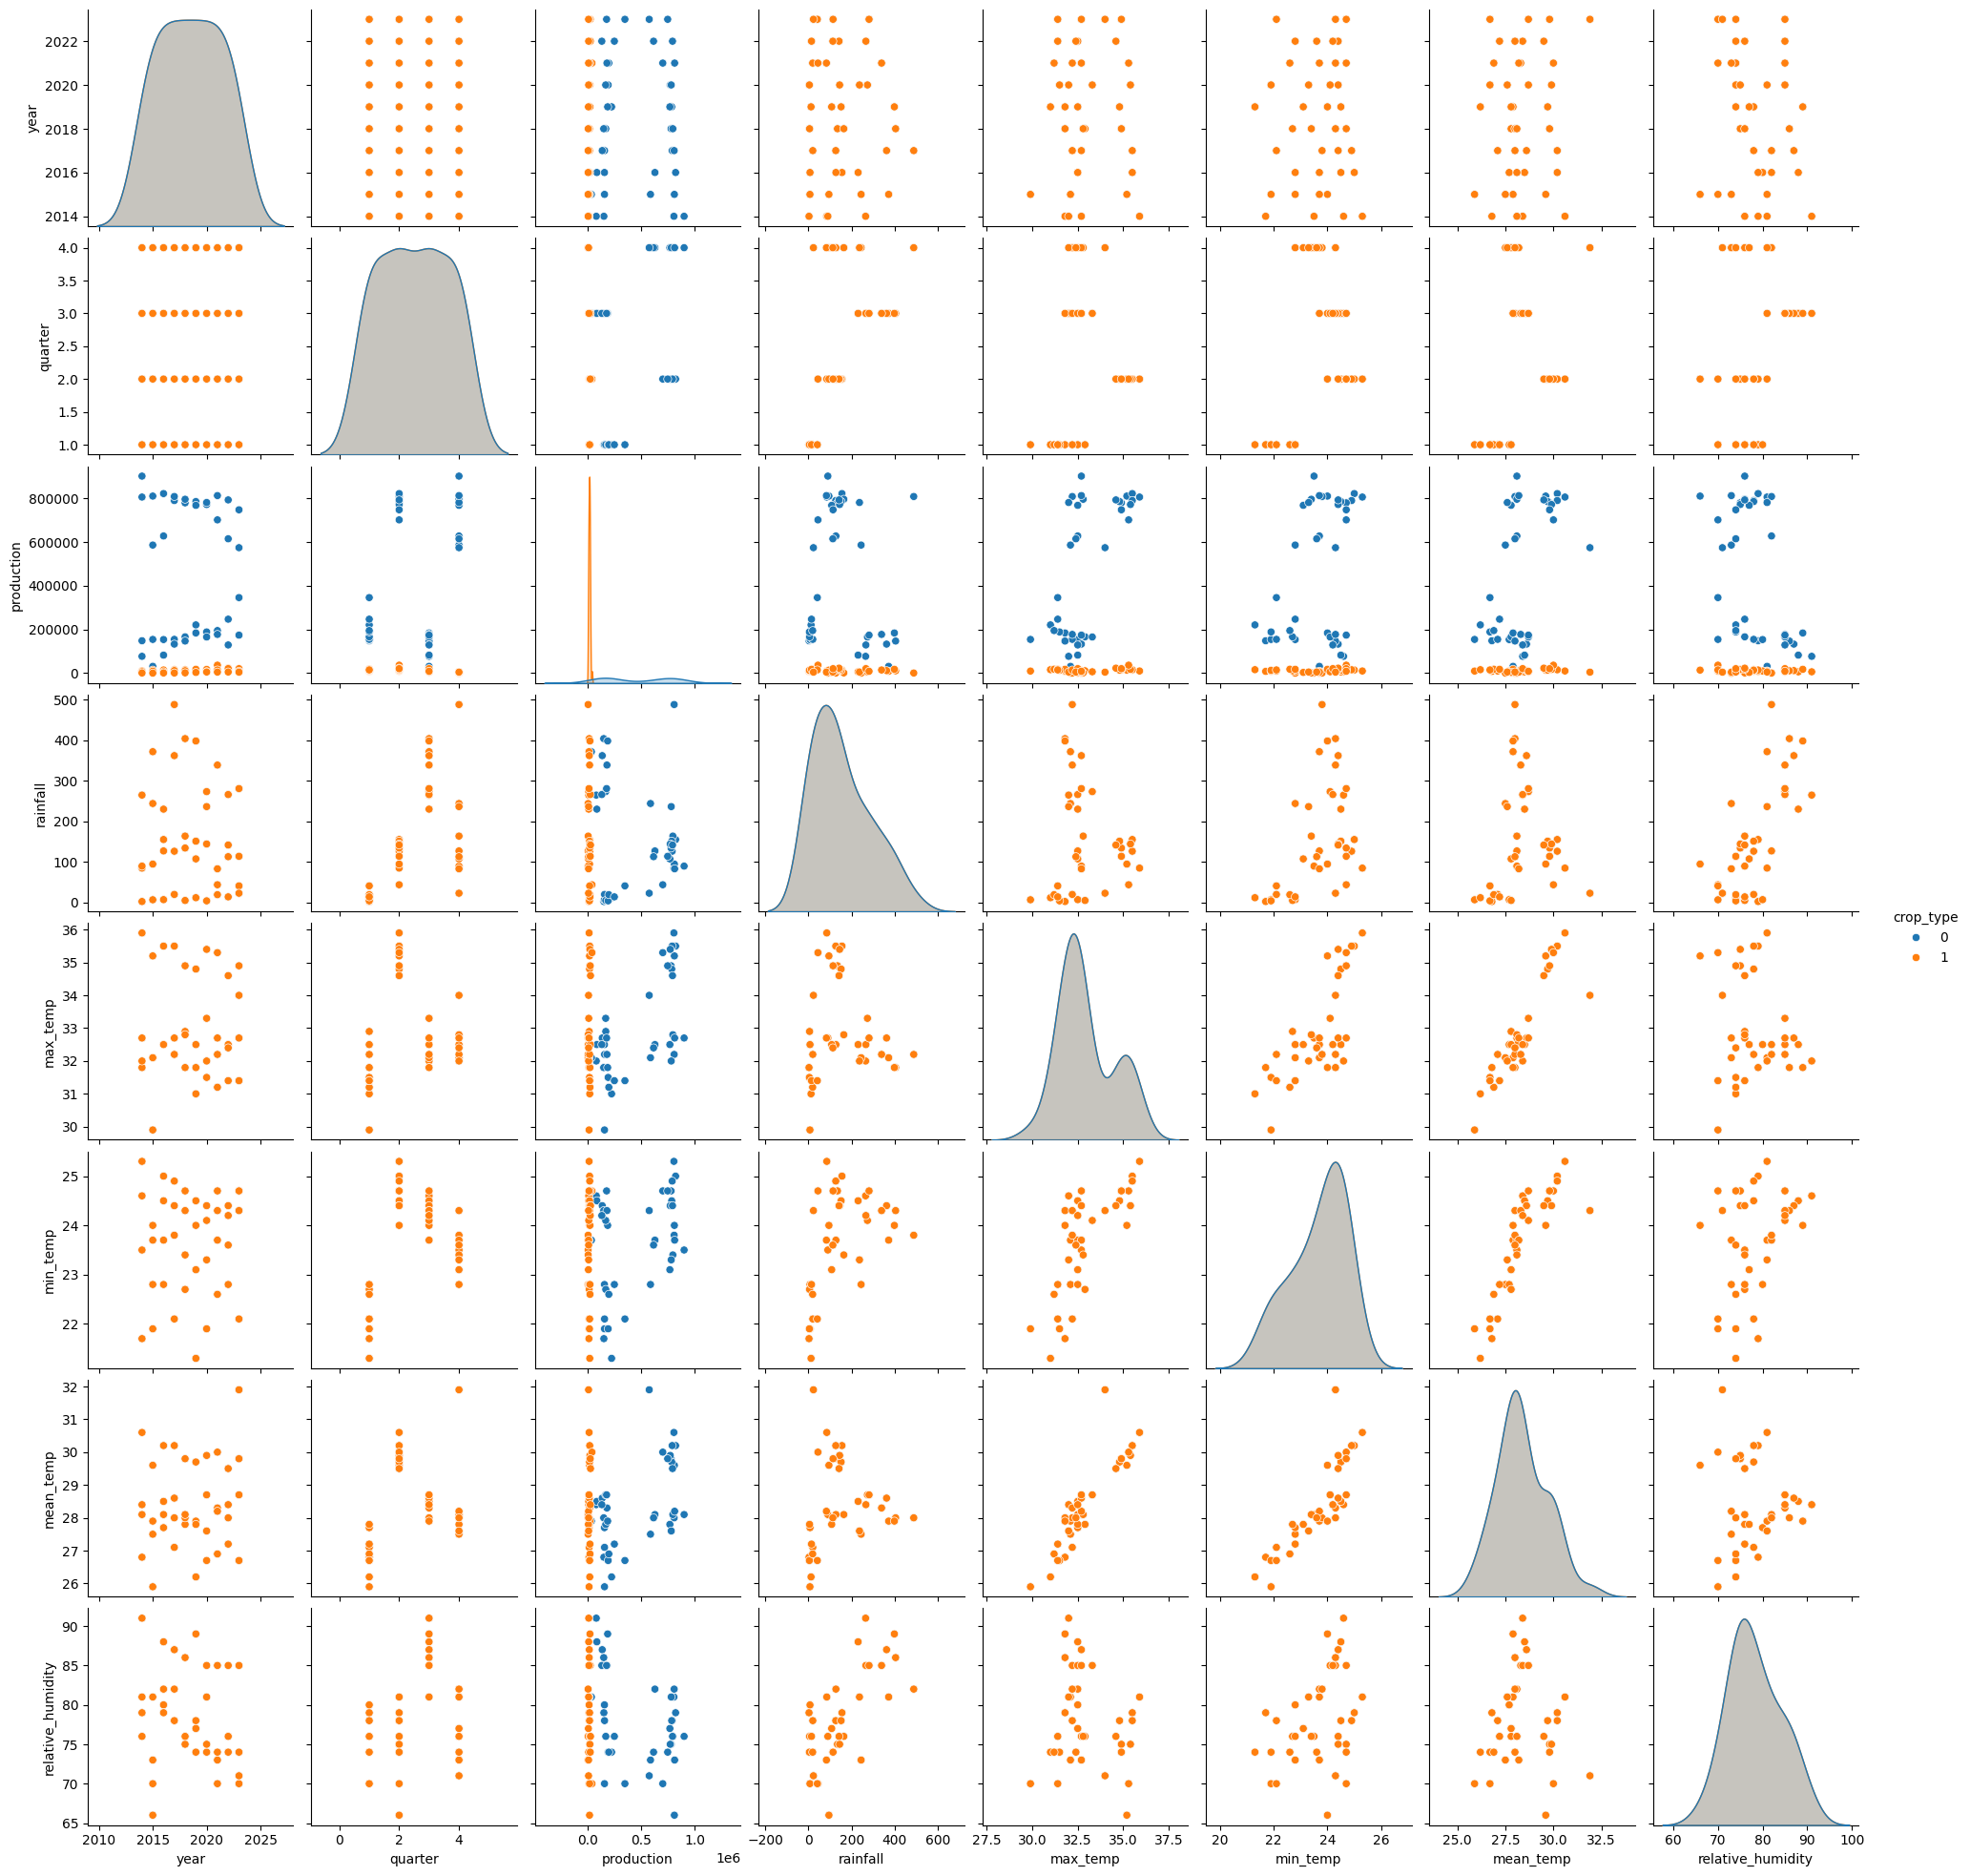

In [ ]:
# Create a new DataFrame for pairplot
pairplot_data = dataframe.copy()

# Create a pairplot
sns.pairplot(pairplot_data, hue='crop_type', diag_kind='kde')

# Show the plot
plt.show()

## II. Feature and Target Selection

In this case, `production` will be the target variable.
Our features `X` will include:

* crop_type
* rainfall
* max_temp
* min_temp
* mean_temp
* relative_humidity

In [ ]:
# Define features and target variable
X = dataframe[['crop_type', 'rainfall', 'max_temp', 'min_temp', 'mean_temp', 'relative_humidity']]
y = dataframe['production']

## III. Training the Model

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Absolute Error: 62304.72249999999
Mean Squared Error: 13826767703.748852
R² Score: 0.7966284586246948


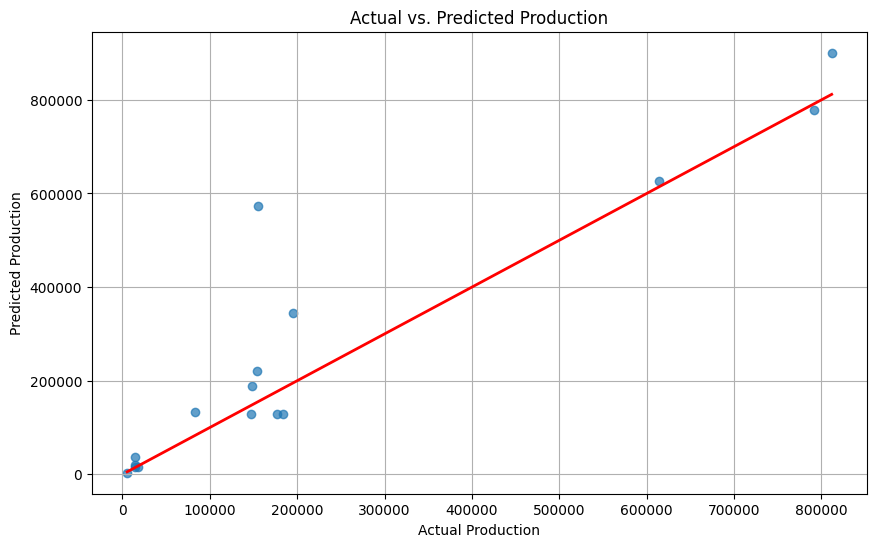

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.title('Actual vs. Predicted Production')
plt.grid()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)

Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best score: 13238080425.548162


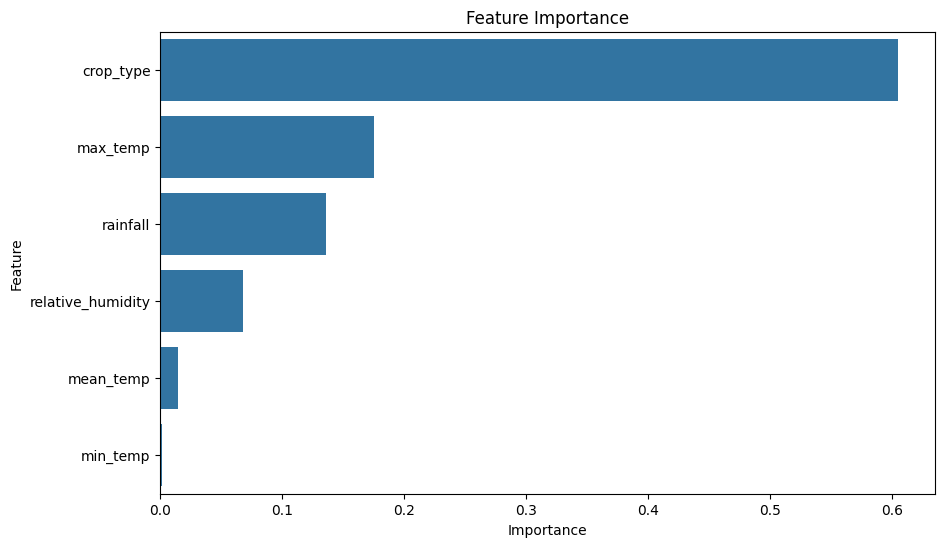

In [ ]:
# Get feature importance
importance = model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

In [ ]:
# Initialize the model with the best parameters
best_model = DecisionTreeRegressor(max_depth=5, min_samples_leaf=1, min_samples_split=2)

# Train the model
best_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
# Predict on the test set
y_pred = best_model.predict(X_test)

predictions_df = pd.DataFrame({'Actual Production': y_test, 'Predicted Production': y_pred})
predictions_df

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error: 92626.10067708333
Mean Squared Error: 28997701240.84488
R² Score: 0.5734862027014247


    Actual Production  Predicted Production Crop Type
30          177217.20          77058.000000     Palay
0           148355.00         169551.363333     Palay
22          183853.80          77058.000000     Palay
31          811684.54         745139.746667     Palay
18          147020.87          77058.000000     Palay
28          194753.63         435601.550000     Palay
10           82548.00         131013.660000     Palay
70           14676.00          13053.400000      Corn
4           154393.00         233730.340000     Palay
12          154708.00         745139.746667     Palay
49           14596.00          14835.570000      Corn
33          791926.95         773860.620000     Palay
67            5441.00           3234.820000      Corn
35          614207.64         745139.746667     Palay
68           18201.26          16663.822500      Corn
45           14049.00          17720.693333      Corn


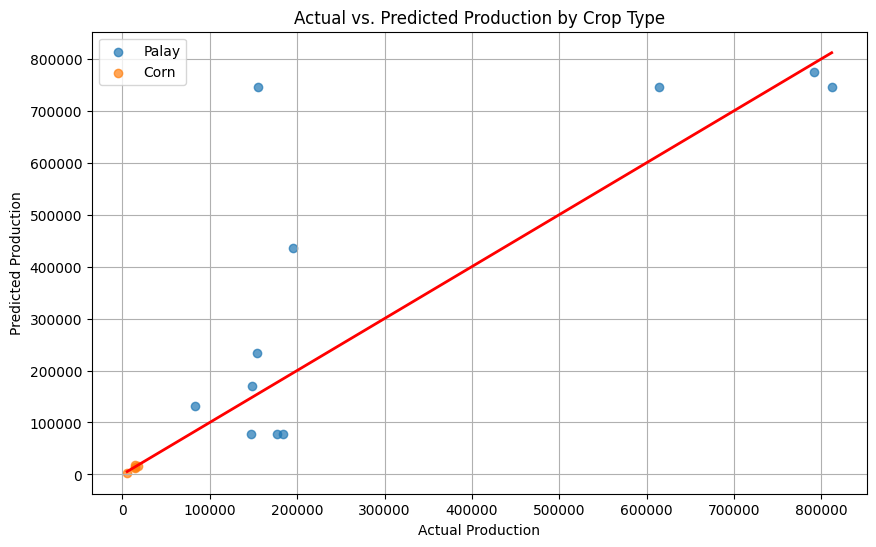

In [ ]:
results = pd.DataFrame({
    'Actual Production': y_test,
    'Predicted Production': y_pred,
    'Crop Type': X_test['crop_type'].values  # Get crop type from X_test
})

# Map numeric crop type to actual names if needed (assuming 0 is Palay and 1 is Corn)
results['Crop Type'] = results['Crop Type'].map({0: 'Palay', 1: 'Corn'})

# Display the results
print(results)

# Optional: Plot Actual vs Predicted with Crop Type
plt.figure(figsize=(10, 6))
for crop in results['Crop Type'].unique():
    subset = results[results['Crop Type'] == crop]
    plt.scatter(subset['Actual Production'], subset['Predicted Production'], label=crop, alpha=0.7)

plt.plot([results['Actual Production'].min(), results['Actual Production'].max()],
         [results['Actual Production'].min(), results['Actual Production'].max()], color='red', lw=2)

plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.title('Actual vs. Predicted Production by Crop Type')
plt.grid()
plt.legend()
plt.show()

# Hyper Tuning for Improved R2

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define a broader parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)


Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 9508333918.387325


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
1600 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1600 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

In [ ]:
# Creating interaction features
X['rainfall_max_temp'] = X['rainfall'] * X['max_temp']
X['rainfall_min_temp'] = X['rainfall'] * X['min_temp']
X['humidity_mean_temp'] = X['relative_humidity'] * X['mean_temp']

<ipython-input-24-555c2e0b9cb9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['rainfall_max_temp'] = X['rainfall'] * X['max_temp']
<ipython-input-24-555c2e0b9cb9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['rainfall_min_temp'] = X['rainfall'] * X['min_temp']


In [ ]:
# Initialize the Decision Tree with the best parameters
best_params = grid_search.best_params_
model = DecisionTreeRegressor(max_depth=best_params['max_depth'],
                               min_samples_split=best_params['min_samples_split'],
                               min_samples_leaf=best_params['min_samples_leaf'],
                               max_features=best_params['max_features'],
                               max_leaf_nodes=best_params['max_leaf_nodes'],
                               random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Absolute Error: 62556.06330555555
Mean Squared Error: 6886308635.342621
R² Score: 0.8987124661698054


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated MSE scores:", -cv_scores)
print("Average Cross-validated MSE:", -cv_scores.mean())

Cross-validated MSE scores: [2.16219439e+11 1.93467319e+11 8.53602764e+10 1.18348494e+11
 5.59674824e+09]
Average Cross-validated MSE: 123798455342.12436


    Actual Production  Predicted Production Crop Type
30          177217.20          77058.000000     Palay
0           148355.00         188512.090000     Palay
22          183853.80          77058.000000     Palay
31          811684.54         900646.000000     Palay
18          147020.87          77058.000000     Palay
28          194753.63         246758.090000     Palay
10           82548.00         131013.660000     Palay
70           14676.00           9322.381111      Corn
4           154393.00         345546.700000     Palay
12          154708.00         246758.090000     Palay
49           14596.00          16566.644000      Corn
33          791926.95         807471.000000     Palay
67            5441.00           9322.381111      Corn
35          614207.64         767092.250000     Palay
68           18201.26           9322.381111      Corn
45           14049.00          36722.500000      Corn


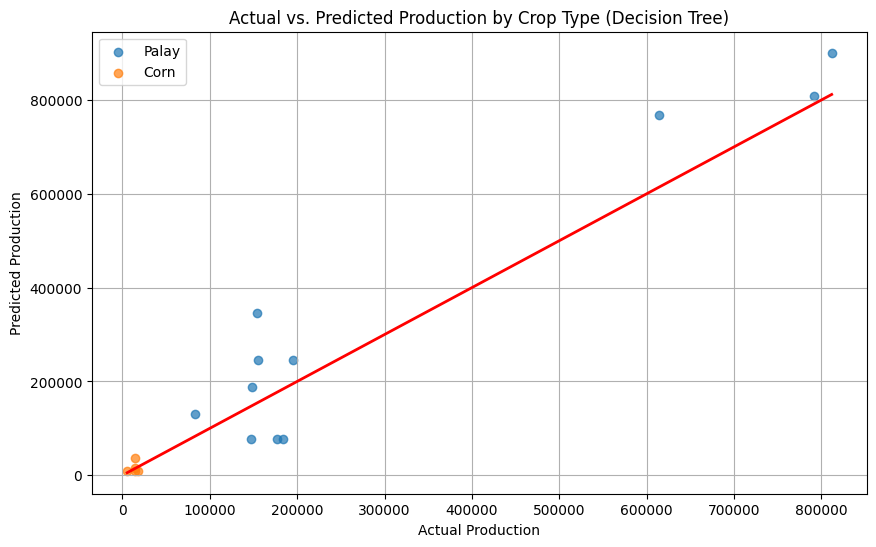

In [ ]:
# Make predictions on the test set with the final model
y_pred = model.predict(X_test)

# Create a DataFrame for actual vs predicted
results = pd.DataFrame({'Actual Production': y_test, 'Predicted Production': y_pred, 'Crop Type': X_test['crop_type'].values})

# Map numeric crop type to actual names
results['Crop Type'] = results['Crop Type'].map({0: 'Palay', 1: 'Corn'})

print(results)

# Plot Actual vs Predicted with Crop Type
plt.figure(figsize=(10, 6))
for crop in results['Crop Type'].unique():
    subset = results[results['Crop Type'] == crop]
    plt.scatter(subset['Actual Production'], subset['Predicted Production'], label=crop, alpha=0.7)

plt.plot([results['Actual Production'].min(), results['Actual Production'].max()],
         [results['Actual Production'].min(), results['Actual Production'].max()], color='red', lw=2)

plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.title('Actual vs. Predicted Production by Crop Type (Decision Tree)')
plt.grid()
plt.legend()
plt.show()


In [ ]:
# Function to predict crop production based on weather parameters
def predict_crop_production(crop_type, rainfall, max_temp, min_temp, mean_temp, relative_humidity):
    input_data = pd.DataFrame({
        'crop_type': [crop_type],
        'rainfall': [rainfall],
        'max_temp': [max_temp],
        'min_temp': [min_temp],
        'mean_temp': [mean_temp],
        'relative_humidity': [relative_humidity]
    })

    input_data['crop_type'] = input_data['crop_type'].map({'Palay': 0, 'Corn': 1})  # 'Palay' is 0 and 'Corn' is 1

    # Use the trained model to make predictions
    predicted_production = best_model.predict(input_data)

    return predicted_production[0]

# Example usage
predicted_value = predict_crop_production(crop_type='Corn', rainfall=273.3, max_temp=33.3, min_temp=24.1, mean_temp=28.7, relative_humidity=85)
print(f'Predicted Crop Production: {predicted_value}')


Predicted Crop Production: 13053.4


In [ ]:
@anvil.server.callable
def predict_crop_production(crop_type, rainfall, max_temp, min_temp, mean_temp, relative_humidity):
   # Create a DataFrame from the input parameters
    input_data = pd.DataFrame({
        'crop_type': [crop_type],
        'rainfall': [rainfall],
        'max_temp': [max_temp],
        'min_temp': [min_temp],
        'mean_temp': [mean_temp],
        'relative_humidity': [relative_humidity]
    })

    input_data['crop_type'] = input_data['crop_type'].map({'Palay': 0, 'Corn': 1})  # 'Palay' is 0 and 'Corn' is 1

    # Use the trained model to make predictions
    predicted_production = best_model.predict(input_data)

    return predicted_production[0]

# GraphViz Library is used for graph generation of the Decision Tree Regressor

In [ ]:
pip install graphviz

In [ ]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/tdany/Downloads/graphviz-2.38/release/bin'

In [ ]:
pip install pydotplus

In [ ]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import collections

feature_names = model.feature_names_in_ if hasattr(model, 'feature_names_in_') else X.columns[:model.n_features_in_]

dot_data = export_graphviz(model, out_file=None, max_depth=5,
                feature_names=feature_names,
                class_names=['Palay', 'Corn'],
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)

graph.write_pdf("model_depth.pdf")

True

In [ ]:
anvil.server.wait_forever()

KeyboardInterrupt: 